In [2]:
import matplotlib.pyplot as plt
import numpy as np

## SOEE3250/SOEE5675M/SOEE5116					

Inverse Theory

# Practical 4: Non-linear least squares

## Geophysical background
The goal is to locate the epicentre (i.e. the x and y co-ordinates, but NOT the depth) of where an earthquake occurred, using the arrival times of two types of seismic wave recorded at 3 seismometers. The locations and arrival times at each seismometer are:

| X-coord (km) |  Y-coord (km) | P-wave arrival | S-wave arrival | 
| :------ |:---------:| :---------: |---------:|
|  27.3570  |      -58.2520 | 28.9   |  40.1
|  5.8120  |   77.4070  | 23.8      |    31.3 |
| -33.0670   |   -18.9540  | 29.5   |       41.2

Each arrival time is measured in seconds after the time 14h:32.
Assume that the seismic velocities for both P- and S- waves are constant, but unknown.
The time (in seconds, after 14h:32) of the earthquake is also unknown.

## Mathematical background
You have 6 arrival times (6 data) and five unknowns (x,y of the wave source, the time that the waves are triggered, and the speed of the two types of measured wave. Your task is to find the unweighted least squares fit.

You will need to use the relationship: speed = distance/time, or total time = slowness * distance + offset time


Q1) What are the measurements? Create a vector (d), ordered with the P-wave arrivals first, then the S-wave arrivals.

In [3]:
d = np.array([28.9, 23.8, 29.5, 40.1, 31.3, 41.2])


Q2) Create a vector (xseis) containing the x-coordinates of the seismometers and a corresponding vector (yseis). Create a new figure and plot the locations of the seismometers as blue circles.

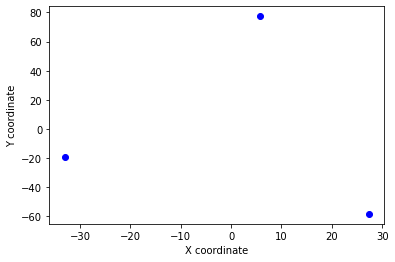

In [4]:
xseis = np.array([27.3570, 5.8120, -33.0670])
yseis = np.array([-58.2520, 77.4070, -18.9540])
plt.figure()
plt.plot(xseis, yseis, 'o', color='blue')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate');

Q3) The five unknown model parameters are (in order):

x,y, slowness_s, slowness_p, time.

Each has units km,km,s/km, s/km, seconds after 14:32
 
Using the slownesses (the reciprocal of speeds) instead of speeds will simplify the maths later on.

The equation that relates $d[0]$, the first data component, to the model parameters (indices 0 - 4) is:
$d[0] = m[4] + m[3] * \sqrt{(xseis[0]-m[0])^2+(yseis[0]-m[1])^2)}$

Write down similar equations for $d[1]$ and $d[2]$. 

$d[1] = m[4] + m[3] * \sqrt{(xseis[1]-m[0])^2+(yseis[1]-m[1])^2)}$

$d[2] = m[4] + m[3] * \sqrt{(xseis[2]-m[0])^2+(yseis[2]-m[1])^2)}$


Q4) Write down the equations that relate the model parameters to the measured S-wave arrival times measurements (in the same format $d[i] = \dots$, where i = 3,4,5). The right hand side of these 3 equations, together with the 3 from the previous question make up $g({\bf m})$.

$d[3] = m[4] + m[2] * \sqrt{(xseis[0]-m[0])^2+(yseis[0]-m[1])^2)}$

$d[4] = m[4] + m[2] * \sqrt{(xseis[1]-m[0])^2+(yseis[1]-m[1])^2)}$

$d[5] = m[4] + m[2] * \sqrt{(xseis[2]-m[0])^2+(yseis[2]-m[1])^2)}$

Q5) Setup a vector m_0 with an initial guess of the model vector with values: [10, 20 ,0.3, 0.1, 0]. Copy the plotting commands from before and add the location of your initial guess to your plot.

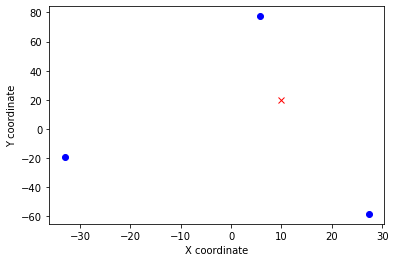

In [5]:
m_0 = np.array([10,20,0.3,0.1,0]  ) 

plt.figure()
plt.plot(xseis, yseis, 'o', color='blue')
plt.plot(m_0[0], m_0[1], 'x', color='red')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate');

Q6) Create a function that determines $g({\bf m)}$.
Use it to calculate $g({\bf m}_0)$, (call this vector d_hat), using the vector of initial guesses. 

The first component is done for you - add to the code to calculate the other components.

You should find that d_hat is approximately [ 8.02   5.76  5.81 24.05  17.27 17.42]

In [6]:
def g_calculate(m):
    """Function that calculates g for given model m"""
    g = np.zeros(6)
    g[0] = m[4] + m[3] * np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    #return
    g[1] = m[4] + m[3] * np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    g[2] = m[4] + m[3] * np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    g[3] = m[4] + m[2] * np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    g[4] = m[4] + m[2] * np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    g[5] = m[4] + m[2] * np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    return g
d_hat = g_calculate(m_0)
print( d_hat )

[ 8.0153858   5.75595604  5.80704796 24.0461574  17.26786812 17.42114389]


Q7) Calculate delta_d =  d – d_hat

In [7]:
delta_d = d - d_hat
print( delta_d )

[20.8846142  18.04404396 23.69295204 16.0538426  14.03213188 23.77885611]


Q8) Make a function that calculates $\partial_{m^T} g( {\bf m})$. You need to differentiate each row of $g({\bf m})$ with respect to each model parameter in turn, giving a 6 x 5 matrix.  The first column is done for you - add to the function to calculate the remaining components.

In [8]:
def g_derivatives(m):
    """Calculate the matrix of derivatives of g"""
    A = np.zeros((6,5))
    xseis = np.array([27.3570, 5.8120, -33.0670])
    yseis = np.array([-58.2520, 77.4070, -18.9540])
    # column 0 is the derivative of g with respect to model variable with index 0.
    A[0,0] = m[3] * (m[0] - xseis[0]) / np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[1,0] = m[3] * (m[0] - xseis[1]) / np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[2,0] = m[3] * (m[0] - xseis[2]) / np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    A[3,0] = m[2] * (m[0] - xseis[0]) / np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[4,0] = m[2] * (m[0] - xseis[1]) / np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[5,0] = m[2] * (m[0] - xseis[2]) / np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)

    A[0,1] = m[3] * (m[1] - yseis[0]) / np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[1,1] = m[3] * (m[1] - yseis[1]) / np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[2,1] = m[3] * (m[1] - yseis[2]) / np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    A[3,1] = m[2] * (m[1] - yseis[0]) / np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[4,1] = m[2] * (m[1] - yseis[1]) / np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[5,1] = m[2] * (m[1] - yseis[2]) / np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    
    A[0,2] = 0
    A[1,2] = 0
    A[2,2] = 0
    A[3,2] = np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[4,2] = np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[5,2] = np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    
    A[0,3] = np.sqrt( (xseis[0]-m[0])**2+(yseis[0]-m[1])**2)
    A[1,3] = np.sqrt( (xseis[1]-m[0])**2+(yseis[1]-m[1])**2)
    A[2,3] = np.sqrt( (xseis[2]-m[0])**2+(yseis[2]-m[1])**2)
    A[3,3] = 0
    A[4,3] = 0
    A[5,3] = 0
    
    A[:,4] = 1
    

    return A


In [9]:
print( g_derivatives(m_0))


[[-2.16546033e-02  9.76272408e-02  0.00000000e+00  8.01538580e+01
   1.00000000e+00]
 [ 7.27594160e-03 -9.97349521e-02  0.00000000e+00  5.75595604e+01
   1.00000000e+00]
 [ 7.41633275e-02  6.70805549e-02  0.00000000e+00  5.80704796e+01
   1.00000000e+00]
 [-6.49638100e-02  2.92881723e-01  8.01538580e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.18278248e-02 -2.99204856e-01  5.75595604e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.22489983e-01  2.01241665e-01  5.80704796e+01  0.00000000e+00
   1.00000000e+00]]


Q9) Use least squares to estimate delta_m from A and delta_d.

You should find that delta_m is approximately [ 28.49836833  9.50982501 -0.03501756  0.03342561 17.91858939]

In [10]:
A = g_derivatives(m_0)
delta_m = np.linalg.inv( A.transpose() @ A) @ A.transpose() @ delta_d

In [11]:
print( delta_m )

[28.49836833  9.50982501 -0.03501756  0.03342561 17.91858939]


Q10) Add delta_m to m_0 to make m_1. This is your revised estimate of the model parameters. Copy and paste your plotting code from above, and add the revised location to your plot as a red circle.

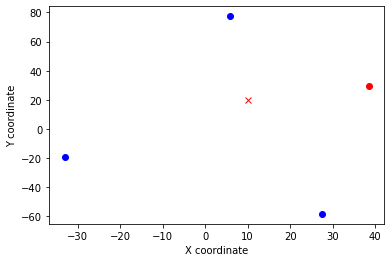

In [12]:
m_1 = m_0 + delta_m

plt.figure()
plt.plot(xseis, yseis, 'o', color='blue')
plt.plot(m_0[0], m_0[1], 'x', color='red')
plt.plot(m_1[0], m_1[1], 'o', color='red')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate');


Q11) Now iterate this procedure 10 times, beginning from m_0, displaying the 0th and 1st component of the model vector each time (i.e. the x,y position). You should see that the values converge, that is, the updates become increasingly small. When the updates lie below a threshold (such as 1e-12), the calculation can be deemed converged. Is 10 iterations enough for convergence? 

Below is some outline code which you need to complete.
Make a plot showing the seismometer locations and each of the (x,y) model positions you find in the 10 iterations.

In [ ]:
current_model = np.array([10,20,0.3,0.1,0]  )
for i in range(10):
    delta_d = #
    A = #
    delta_m = #
    current_model = # update the current model
    

[28.49836833  9.50982501]
[10.84681964  2.5551663 ]
[0.23748893 0.6394298 ]
[-0.01032977 -0.00016821]
[-7.12593248e-05 -5.60296276e-05]
[-1.59601477e-07 -1.03259589e-07]
[-4.17137144e-10 -3.27222752e-10]
[-9.04054609e-13 -6.12794537e-13]
[-4.56856775e-14  1.62717062e-14]
[-3.86912724e-14 -5.16843512e-14]
[49.57227572 32.70419677]


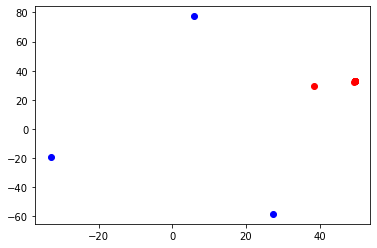

In [13]:
plt.figure()
plt.plot(xseis, yseis, 'o', color='blue')

current_model = np.array([10,20,0.3,0.1,0]  )
for i in range(10):
    delta_d = d - g_calculate(current_model)
    A = g_derivatives(current_model)
    delta_m = np.linalg.inv( A.transpose() @ A) @ A.transpose() @ delta_d
    current_model = current_model + delta_m
    plt.plot( current_model[0], current_model[1],'o', color='red')
    print( delta_m[0:2])
print( current_model[0:2] )

10 iterations is enough for convergence, using a threshold of 1e-12.